# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Import the core data science libraries:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [32]:
# place your code into this Code cell
import os
df = pd.read_csv(os.path.join('data', 'data.csv'))

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

## 5 Random Rows

The code below samples 5 random rows from the dataframe.

In [6]:
df.sample(5)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
246,14K322,FOUNDATIONS ACADEMY,28.0,373.0,377.0,359.0
285,17K524,International High School @Prospect Hgt,32.0,302.0,339.0,325.0
115,07X427,Community High School Social Justice,50.0,372.0,351.0,359.0
11,02M294,HIGH SCHOOL FOR HIST AND COMM,51.0,382.0,364.0,366.0
373,24Q560,ROBERT F WAGNER JR SECONDARY,49.0,420.0,440.0,421.0


## Column Names and Data Types

This shows each of the columns of my data, and their corresponding data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DBN                    460 non-null    object 
 1   School Name            460 non-null    object 
 2   Number of Test Takers  386 non-null    float64
 3   Critical Reading Mean  386 non-null    float64
 4   Mathematics Mean       386 non-null    float64
 5   Writing Mean           386 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.7+ KB


## Unique Values in Dataframe

This command shows all the unique values present within each column (doesn't count duplicate values, which is why the count is different from the one in the top).

In [8]:
df.nunique()

DBN                      458
School Name              460
Number of Test Takers    162
Critical Reading Mean    157
Mathematics Mean         165
Writing Mean             147
dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

## Removing Empty Records

I'm using the dropna function with 'any' to remove any rows which contains a null values within it. This makes the data cleaner and removes unnecessary rows. As we can see, 74 rows that had empty values within them were dropped after this function was called.

In [33]:
print("Rows before drop: ", df.shape[0])
df = df.dropna(how='any', axis=0)
print("Rows after drop: ", df.shape[0])



Rows before drop:  460
Rows after drop:  386


## Showing 5 rows from the munged data set

Since we didn't change any of the columns, the data appears the same, but internally, there is no longer any rows with null values within them.

In [34]:
df.sample(5)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
191,10X660,Grace Dodge Vocational High School,93.0,380.0,385.0,369.0
427,30Q450,LONG ISLAND CITY HIGH SCHOOL,296.0,418.0,434.0,408.0
50,02M542,MANHATTAN BRIDGE HIGH SCHOOL,31.0,345.0,380.0,325.0
220,12X400,Morris High School,9.0,369.0,374.0,360.0
179,10X434,Belmont Preparatory High School,65.0,358.0,370.0,346.0


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

## Overall average Critical Reading Score

This calculates the overall average Critical reading score for every school within the dataset (all school scores are weighted equally regardless of number of test takers)

In [116]:
df['Critical Reading Mean'].mean()

404.24870466321244

## Average Critical Reading Mean of Schools with a lower than 300 Writing Mean

Now we know the general Critical Reading Mean of all schools, let's see if the mean will be lower if we only take average the critical reading score for schools with low writing scores (< 300)

In [57]:
df[df['Writing Mean'] < 300]['Critical Reading Mean'].mean()

312.3333333333333

## Correlation of Critical Reading Mean and Writing Mean

It seems that schools with low Writing Mean scores similarly have a lower than average Crtitical Reading scores as well. But let's check this by calculating the correlation, and we can see that they are indeed postively correlated (This means that as writing mean increases, critical reading mean also increases, and vice versa)

In [60]:
df['Critical Reading Mean'].corr(df['Writing Mean'])

0.9784044711541666

## Correlation of Critical Reading Mean and Mathematics Mean

We now know that Critical Reading Mean and Writing Mean is postively correlated, let's see if Critical Reading and Mathematics are also correlated. We can see that they also are postively correlated, though not as much as reading and writing. This would suggest that if a school has a higher critical reading score, the will also have a higher mathematics score.

In [59]:
df['Critical Reading Mean'].corr(df['Mathematics Mean'])

0.8940791399705394

## Percentage of schools with a Critical Reading Mean greater than 400

This checks for the percent of schools with a higher Critical Reading Mean that is greater than 400. We can see that a little less than half the schools in the dataset have achieved an Critical Reading mean that is higher than 400. 

In [68]:
percent = df[df['Critical Reading Mean'] > 400].shape[0] / df.shape[0]
percent *= 100
print(f"{percent:.2f}%")


41.71%


## Critical Reading means from Schools with more than 500 Test Takers

I wanted to check if schools with a larger amount of test takers would score higher or lower, and it seems that larger schools seems to have a higher Critical Reading average compared to the total average of all schools.

In [70]:
df[df['Number of Test Takers'] > 500]["Critical Reading Mean"].mean()

502.8

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

## Histogram of Critical Reading Mean

This graph shows the break down of the amount of schools that have a certain critical reading mean. It seems pretty normaly distributed, and the average seems to be around 375. We can see that a sort of bell curve is formed from the data.

Text(0, 0.5, 'Frequency')

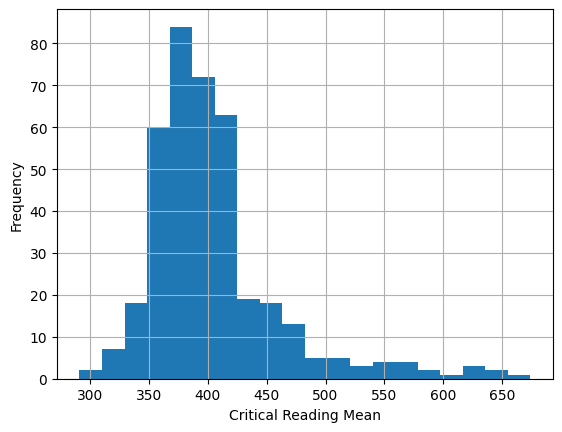

In [81]:
df['Critical Reading Mean'].hist(bins=20)
plt.xlabel('Critical Reading Mean')
plt.ylabel('Frequency')

## Histogram of Mathematics Mean

This is a histogram that shows the amount of schools that have a certain critical reading mean. There are more schools that share a similar score range than the critical reading graph. It also doesn't form as nice as a bell curve as the critical reading mean does.

Text(0, 0.5, 'Frequency')

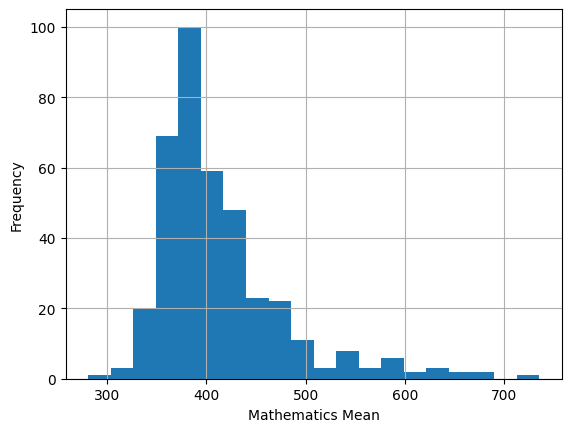

In [91]:
df['Mathematics Mean'].hist(bins=20)
plt.xlabel('Mathematics Mean')
plt.ylabel('Frequency')

## Line Chart Showing Critical Reading Mean and Writing Mean

This is a graph that plots a line chart of both the critical reading mean and writing mean. We saw in the data analysis that they had a very positive correlation, and we can see that the graphs are almost overlapping.

Text(0, 0.5, 'Mean')

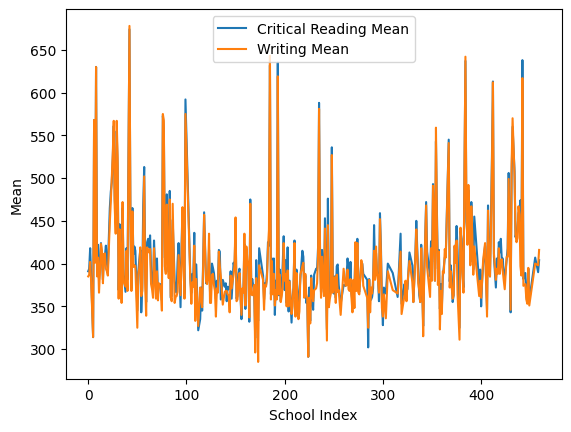

In [117]:
df[['Critical Reading Mean', 'Writing Mean']].plot()
plt.xlabel('School Index')
plt.ylabel('Mean')

## Pie Chart of Critical Reading Mean

This graph shows the proportions of the data ranges for the 'Critical Reading Mean' scores. Each slice of the pie represents a different range of scores, and the size of the slice corresponds with the number of schools that fall within the range. This lets us see that most schools scored between 300 and 400 on the critical reading section.

C:\Users\Mathew\AppData\Local\Temp\ipykernel_21052\2390227263.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Critical Reading Mean'].groupby(pd.cut(df['Critical Reading Mean'], bins=bins)).count().plot(kind='pie')


<Axes: ylabel='Critical Reading Mean'>

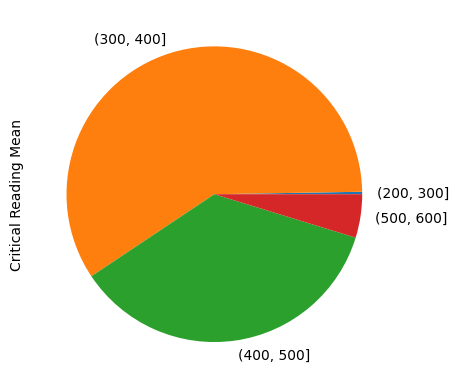

In [118]:
bins = [200, 300, 400, 500, 600]
df['Critical Reading Mean'].groupby(pd.cut(df['Critical Reading Mean'], bins=bins)).count().plot(kind='pie')

## Pie Chart of Number of Test Takers

This is a pie chart shows the proportions of the number of test takers from the dataset. Each slice is scaled by the number of schools within that range, so we can see that most of the schools in the dataset had less than 100 test takers. 

C:\Users\Mathew\AppData\Local\Temp\ipykernel_21052\3808308927.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Number of Test Takers'].groupby(pd.cut(df['Number of Test Takers'], bins=bins)).count().plot(kind='pie')


<Axes: ylabel='Number of Test Takers'>

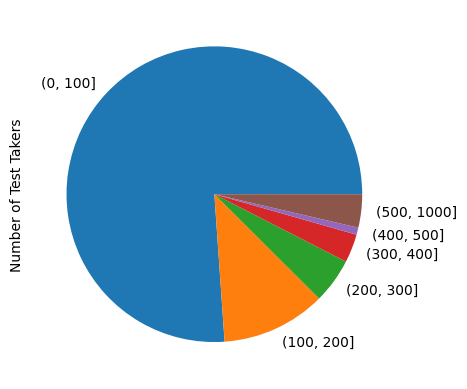

In [120]:
bins = [0, 100, 200, 300, 400, 500, 1000]
df['Number of Test Takers'].groupby(pd.cut(df['Number of Test Takers'], bins=bins)).count().plot(kind='pie')